1. Перший крок — завантажити дані та переконатися, що все рахувалося правильно: подивитися на стовпці, розмір, наявність пропущених значень (якщо є — видалити). Також вивчіть типи змінних.

In [8]:
import pandas as pd
import seaborn as sns

url = 'https://raw.githubusercontent.com/Aranaur/aranaur.rbind.io/main/datasets/video_games_sales/vgsales.csv'
data = pd.read_csv(url)

print(data.info()) # перевірка розміру та наявності пропущених значень

data = data.dropna() # видалення пропущених значень

print(data.dtypes) # перевірка типів

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
d

2. Побудуйте графік розподілу кількості випущених ігор за роками та виведіть описові характеристики змінної Year.

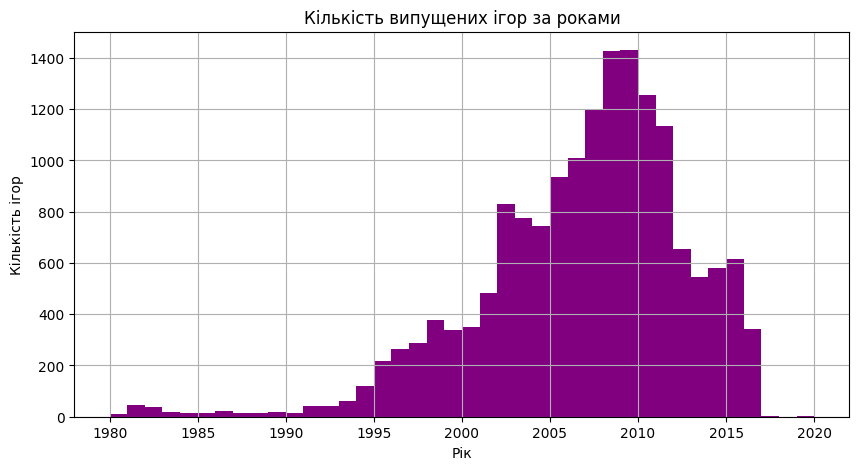

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64


In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
data['Year'].dropna().astype(int).hist(bins=40, color='purple')
plt.title('Кількість випущених ігор за роками')
plt.xlabel('Рік')
plt.ylabel('Кількість ігор')
plt.show()

print(data['Year'].describe())

3. На яких платформах відбулося найбільше релізів?

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: count, dtype: int64


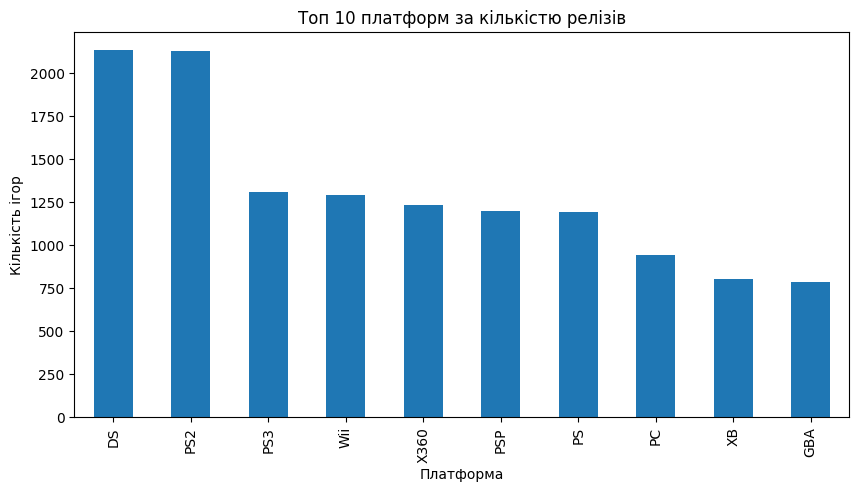

In [10]:
platforms = data['Platform'].value_counts().head(10)
print(platforms)

platforms.plot(kind='bar', figsize=(10,5))
plt.title('Топ 10 платформ за кількістю релізів')
plt.xlabel('Платформа')
plt.ylabel('Кількість ігор')
plt.show()

4. Ігри яких видавців (Publisher) зустрічаються в датасеті найчастіше?

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: count, dtype: int64


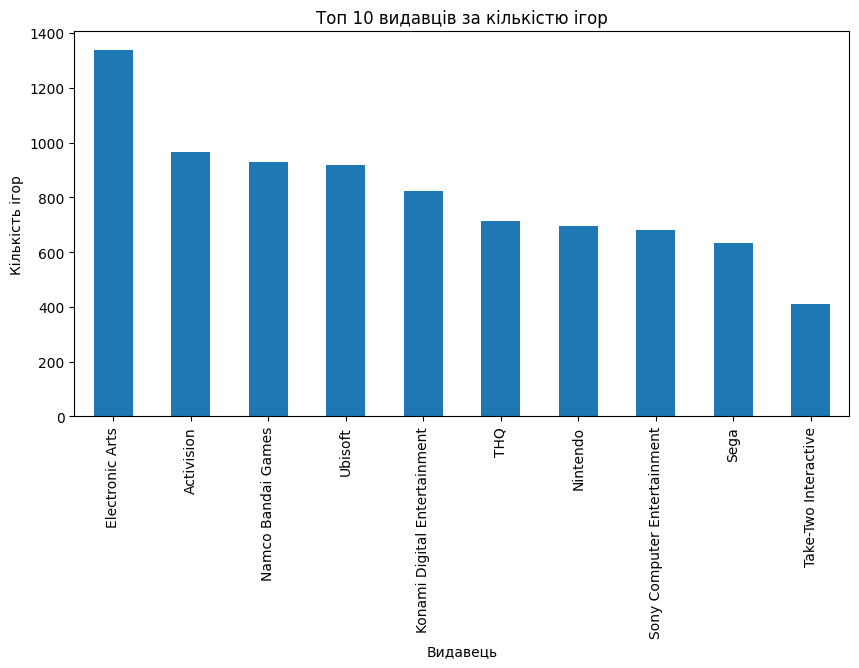

In [11]:
publishers = data['Publisher'].value_counts().head(10)
print(publishers)

publishers.plot(kind='bar', figsize=(10,5))
plt.title('Топ 10 видавців за кількістю ігор')
plt.xlabel('Видавець')
plt.ylabel('Кількість ігор')
plt.show()

5. У якому регіоні медіанне значення обсягу продажів ігор Nintendo є найбільшим? (Регіони: NA, EU, JP, Other)

Північна Америка Медіана: 0.375
Європа Медіана: 0.12
Японія Медіана: 0.28
Інші Медіана: 0.03


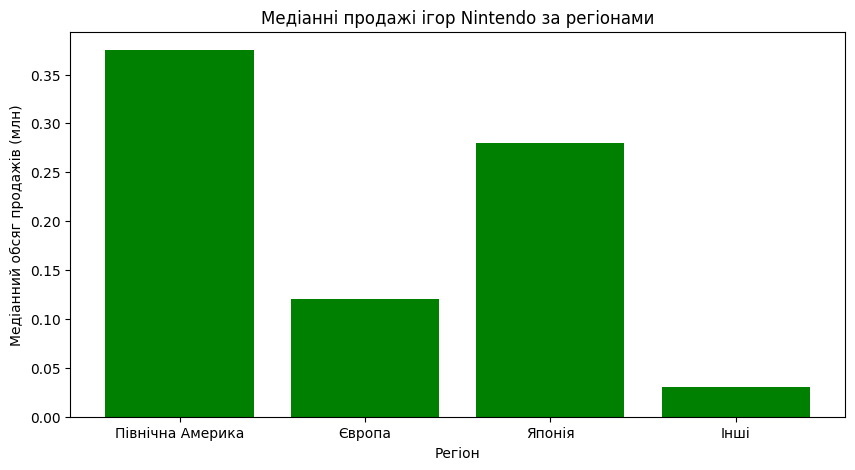

In [12]:
nintendo_games = data[data['Publisher'] == 'Nintendo'] # видавець Nintendo

# медіанна продажів по регіонам
regions = ['Північна Америка', 'Європа', 'Японія', 'Інші']
medians = [nintendo_games['NA_Sales'].median(), nintendo_games['EU_Sales'].median(), 
           nintendo_games['JP_Sales'].median(), nintendo_games['Other_Sales'].median()]

for region, median in zip(regions, medians):
    print(f"{region} Медіана: {median}")

plt.figure(figsize=(10,5))
plt.bar(regions, medians, color='Green')
plt.title('Медіанні продажі ігор Nintendo за регіонами')
plt.xlabel('Регіон')
plt.ylabel('Медіанний обсяг продажів (млн)')
plt.show()

6. Вивчіть обсяги продажів ігор Nintendo в Японії з розбивкою за жанрами. Подивіться на медіану, середнє, міжквартильний розмах.

              median      mean  quantile
Genre                                   
Action         0.170  0.373846     0.170
Adventure      0.090  0.257429     0.090
Fighting       0.500  0.830000     0.500
Misc           0.250  0.552500     0.250
Platform       0.540  0.922162     0.540
Puzzle         0.255  0.501216     0.255
Racing         0.340  0.789730     0.340
Role-Playing   0.360  0.970952     0.360
Shooter        0.130  0.251250     0.130
Simulation     0.390  0.844643     0.390
Sports         0.250  0.652182     0.250
Strategy       0.190  0.337419     0.190


C:\Users\Dima\AppData\Local\Temp\ipykernel_75644\826221825.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jp_sales_by_genre.index, y=jp_sales_by_genre['median'], palette='Set2')


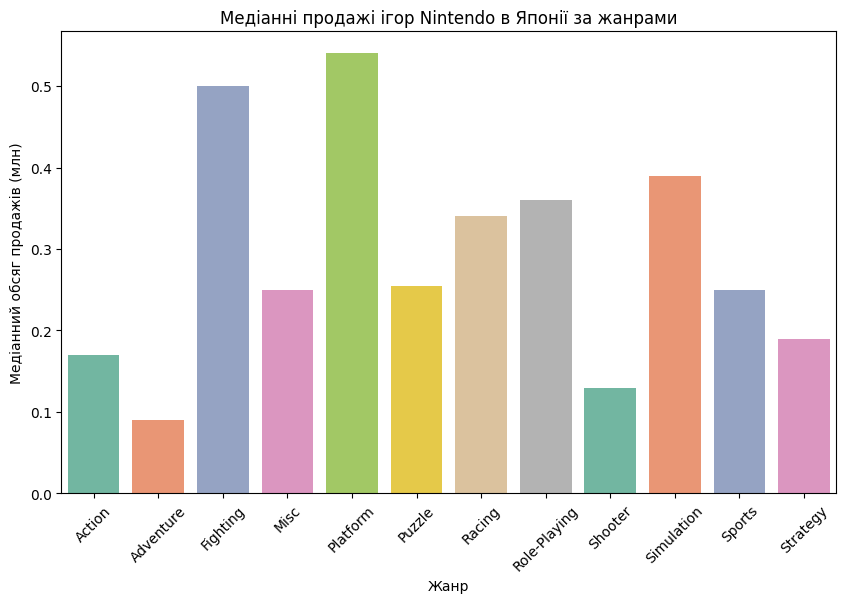

In [13]:
import seaborn as sns

# фільтр ігри Nintendo в Японії
nintendo_jp = nintendo_games[['Genre', 'JP_Sales']]

# жанри
jp_sales_by_genre = nintendo_jp.groupby('Genre')['JP_Sales'].agg(['median', 'mean', 'quantile'])
print(jp_sales_by_genre)

plt.figure(figsize=(10,6))

sns.barplot(x=jp_sales_by_genre.index, y=jp_sales_by_genre['median'], palette='Set2')
plt.title('Медіанні продажі ігор Nintendo в Японії за жанрами')
plt.xlabel('Жанр')
plt.ylabel('Медіанний обсяг продажів (млн)')
plt.xticks(rotation=45)
plt.show()

7. Візуалізуйте динаміку зміни обсягу світових продажів (Global_Sales) за роками для ігор Nintendo таких жанрів: Fighting, Simulation, Platform, Racing, Sports. У які моменти часу було продано найбільше ігор жанру Sports?

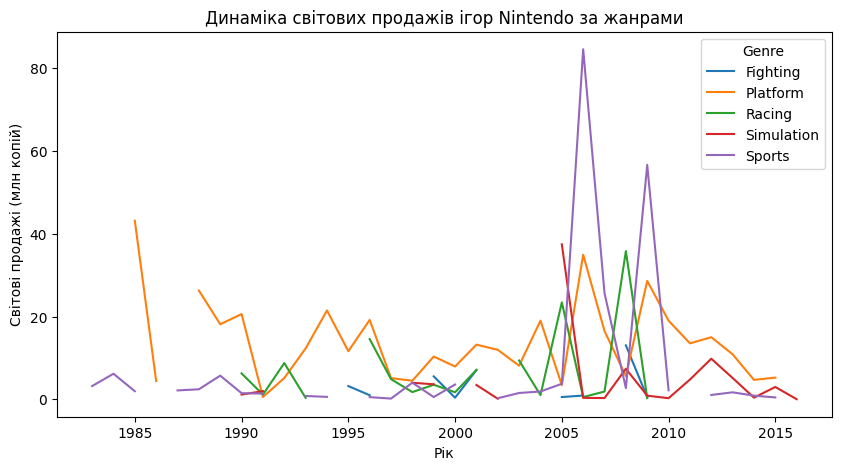

Момент найбільших продажів ігор жанру Sports: 2006.0 рік


In [14]:
selected_genres = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports'] # конкретні жанри
nintendo_selected = nintendo_games[nintendo_games['Genre'].isin(selected_genres)]

sales_by_year = nintendo_selected.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack() # продажі за роками

sales_by_year.plot(figsize=(10,5))
plt.title('Динаміка світових продажів ігор Nintendo за жанрами')
plt.xlabel('Рік')
plt.ylabel('Світові продажі (млн копій)')
plt.show()



# У які моменти часу було продано найбільше ігор жанру Sports?
sports_sales = nintendo_selected[nintendo_selected['Genre'] == 'Sports']

best_year_sports = sports_sales.groupby('Year')['Global_Sales'].sum().idxmax() # рік найбільших продажів

print(f"Момент найбільших продажів ігор жанру Sports: {best_year_sports} рік")